<a href="https://www.kaggle.com/jarupula/covid19-classification-cnn-with-2-6m-params?scriptVersionId=88616651" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Neural Network mini-project✨

- *This project is done as part of the course at National Institute of Technology Silchar ([NITS](http://nits.ac.in)). In this notebook we will be analyzing the sarscov2-ctscan-dataset using Simple Convolutional Neural Network architechture.* 

**Please upvote if you find this helpful.**

# 📚Loading dependencies📚

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
from keras.utils import plot_model
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_curve, auc, precision_score, accuracy_score, confusion_matrix

# Defining some helper function for reading the dataset ⚙

In [2]:
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath)) 

def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation = cv2.INTER_AREA)

# Loading dataset⏳

In [3]:
disease_types=['COVID', 'non-COVID']
data_dir = '../input/sarscov2-ctscan-dataset/'
train_dir = os.path.join(data_dir)

In [4]:
train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])      
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])

In [5]:
IMAGE_SIZE = 64
X = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values), total = len(train)):
    image = read_image(file)
    if image is not None:
        X[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
X /= 255.        
y = train['DiseaseID'].values
print(X.shape)
print(y.shape)


(2481, 64, 64, 3)
(2481,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 1)

In [7]:
x_train[:2]

array([[[[0.91372549, 0.91372549, 0.91372549],
         [0.9254902 , 0.9254902 , 0.9254902 ],
         [0.92156863, 0.92156863, 0.92156863],
         ...,
         [0.92941176, 0.92941176, 0.92941176],
         [0.92941176, 0.92941176, 0.92941176],
         [0.92941176, 0.92941176, 0.92941176]],

        [[0.91764706, 0.91764706, 0.91764706],
         [0.91764706, 0.91764706, 0.91764706],
         [0.91764706, 0.91764706, 0.91764706],
         ...,
         [0.92156863, 0.92156863, 0.92156863],
         [0.9254902 , 0.9254902 , 0.9254902 ],
         [0.92941176, 0.92941176, 0.92941176]],

        [[0.9254902 , 0.9254902 , 0.9254902 ],
         [0.91372549, 0.91372549, 0.91372549],
         [0.91764706, 0.91764706, 0.91764706],
         ...,
         [0.9254902 , 0.9254902 , 0.9254902 ],
         [0.92156863, 0.92156863, 0.92156863],
         [0.92941176, 0.92941176, 0.92941176]],

        ...,

        [[0.82745098, 0.82745098, 0.82745098],
         [0.83137255, 0.83137255, 0.83137255]

In [8]:
y[:]

array([0, 0, 0, ..., 1, 1, 1])

# Model 🤖

In [9]:
np.random.seed(3)

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

model.add(layers.Dropout(0.5))
model.add(layers.Conv2D(528, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

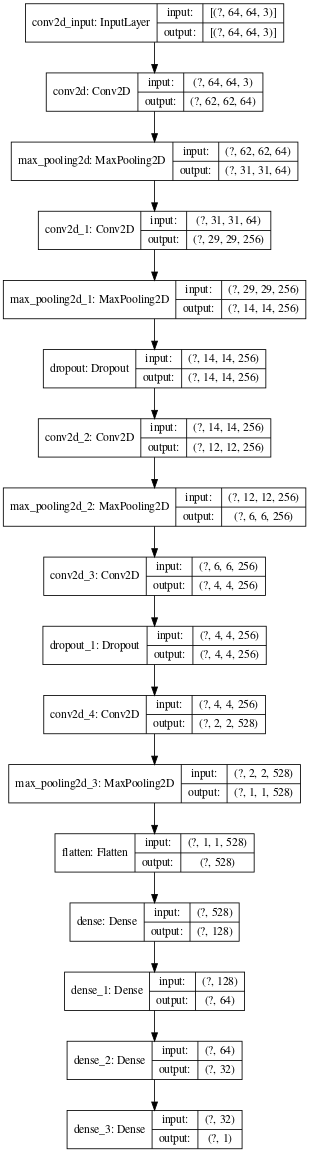

In [10]:
plot_model(model, 
           show_shapes = True, 
           show_layer_names = True, 
           rankdir = 'TB', 
           expand_nested = False, 
           dpi = 60)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 256)       147712    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)         0

# Training the model 💻

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=64, epochs=30,
                    verbose=1,validation_split=0.1)

Epoch 1/30
28/28 [==============================] - 1s 32ms/step - loss: 0.8803 - accuracy: 0.5070 - val_loss: 0.6938 - val_accuracy: 0.4874
Epoch 2/30
28/28 [==============================] - 0s 18ms/step - loss: 0.6938 - accuracy: 0.5328 - val_loss: 0.6928 - val_accuracy: 0.4874
Epoch 3/30
28/28 [==============================] - 1s 20ms/step - loss: 0.7068 - accuracy: 0.5395 - val_loss: 0.6856 - val_accuracy: 0.5729
Epoch 4/30
28/28 [==============================] - 0s 18ms/step - loss: 0.6889 - accuracy: 0.6062 - val_loss: 0.7114 - val_accuracy: 0.5126
Epoch 5/30
28/28 [==============================] - 1s 18ms/step - loss: 0.6756 - accuracy: 0.6157 - val_loss: 0.6399 - val_accuracy: 0.6633
Epoch 6/30
28/28 [==============================] - 1s 18ms/step - loss: 0.6214 - accuracy: 0.6689 - val_loss: 0.6198 - val_accuracy: 0.6884
Epoch 7/30
28/28 [==============================] - 0s 18ms/step - loss: 0.6213 - accuracy: 0.6711 - val_loss: 0.5791 - val_accuracy: 0.7236
Epoch 8/30
28

In [13]:
y_pred = model.predict_classes(x_test)

# ROC curve📈

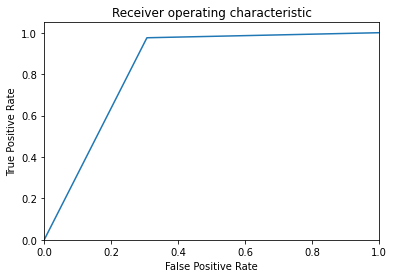

In [14]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

    
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [15]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Performence metrics🛠

In [16]:
sp = tn/(tn+fp)
sn = tp/(tp+fn)

print('f1 score =  %.3f'%f1_score(y_test, y_pred))
print('Precision =  %.3f'%precision_score(y_test, y_pred))
print('Test accuracy =  %.3f'%accuracy_score(y_test, y_pred))
print('Specificity =  %.3f'%sp)
print('Sensitivity =  %.3f'%sn)

f1 score =  0.853
Precision =  0.757
Test accuracy =  0.833
Specificity =  0.693
Sensitivity =  0.976
